## Homework 2

#### John Stachurski

Shenzhen Winter Camp 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [2]:
K = norm.pdf

class KDE:
    
    def __init__(self, x_data, h=None):

        if h is None:
            σ = x_data.std()
            n = len(x_data)
            h = 1.06 * σ * n**(-1/5)
        self.h = h
        self.x_data = x_data

    def f(self, x):
        if np.isscalar(x):
            return K((x - self.x_data) / self.h).mean() * (1/self.h)
        else:
            y = np.empty_like(x)
            for i, x_val in enumerate(x):
                y[i] = K((x_val - self.x_data) / self.h).mean() * (1/self.h)
            return y

In [3]:

def plot_kde(ϕ, x_min=-0.2, x_max=1.2):
    x_data = ϕ.rvs(n)
    kde = KDE(x_data)
    
    x_grid = np.linspace(-0.1, 1.1, 100)
    fig, ax = plt.subplots()
    ax.plot(x_grid, kde.f(x_grid))
    ax.plot(x_grid, ϕ.pdf(x_grid))
    plt.show()

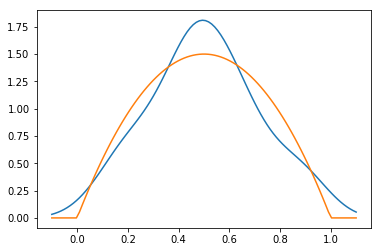

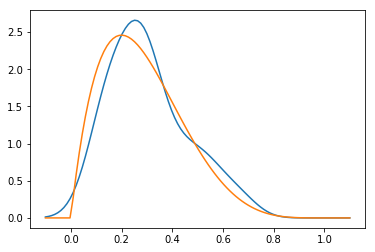

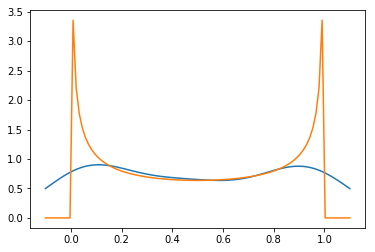

In [4]:

n = 100
parameter_pairs= (2, 2), (2, 5), (0.5, 0.5)
for α, β in parameter_pairs:
    plot_kde(beta(α, β))


### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

In [5]:
ρ = 0.9
b = 0.0
σ = 0.1
μ = -3
s = 0.2

In [6]:
μ_next = ρ * μ + b
s_next = np.sqrt(ρ**2 * s**2 + σ**2)

In [7]:
ψ = lambda x: K((x - μ) / s)
ψ_next = lambda x: K((x - μ_next) / s_next)

In [8]:
ψ = norm(μ, s)
ψ_next = norm(μ_next, s_next)

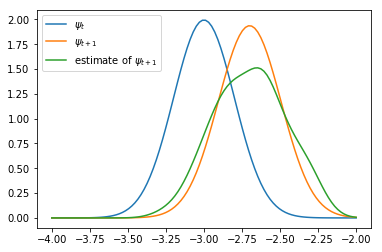

In [9]:
n = 100
x_draws = ψ.rvs(n)
x_draws_next = ρ * x_draws + b + σ * np.random.randn(n)
kde = KDE(x_draws_next)

x_grid = np.linspace(μ - 1, μ + 1, 100)
fig, ax = plt.subplots()

ax.plot(x_grid, ψ.pdf(x_grid), label="$\psi_t$")
ax.plot(x_grid, ψ_next.pdf(x_grid), label="$\psi_{t+1}$")
ax.plot(x_grid, kde.f(x_grid), label="estimate of $\psi_{t+1}$")

ax.legend()
plt.show()